# Spectral classification of fetal S1

##

Importing packages

In [2]:
import pyPCG, pyPCG.io, pyPCG.segment, pyPCG.preprocessing
import numpy as np
import matplotlib.pyplot as plt

Filename of our input signal and label file

In [3]:
file = "example_1"

Reading in our signals and manual labels

In [4]:
signal = pyPCG.pcg_signal(*pyPCG.io.read_signal_file(f"{file}.wav","wav"))
labels = pyPCG.io.read_hsannot_file(f"{file}.csv")

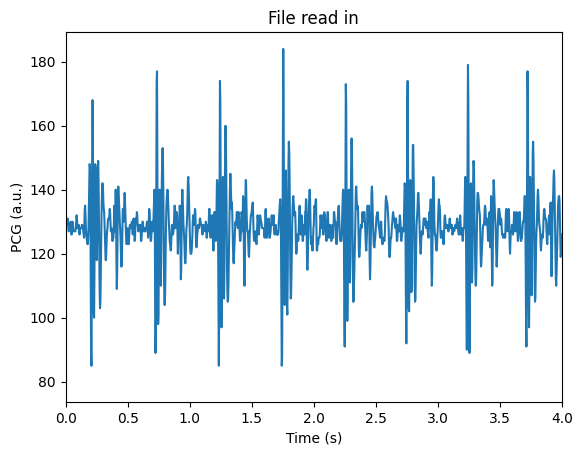

In [5]:
pyPCG.plot(signal,xlim=(0,4))

In [6]:
signal = pyPCG.normalize(signal)

(0.0, 4.0)

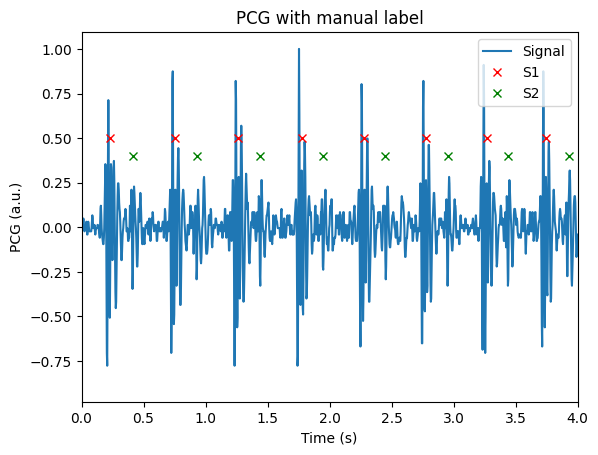

In [7]:
s1_label = np.array(labels[0])
s2_label = np.array(labels[1])

plt.figure()
pyPCG.plot(signal)
plt.plot(s1_label,np.ones_like(s1_label)*0.5,'rx')
plt.plot(s2_label,np.ones_like(s2_label)*0.4,'gx')
plt.legend(["Signal","S1","S2"])
plt.title("PCG with manual label")
plt.xlim((0,4))

Calculating envelope with Hilbert transform

In [8]:
envelope = pyPCG.preprocessing.envelope(signal)

Converting peaks to segments

In [9]:
s1 = np.round(s1_label*signal.fs).astype(int)

starts, ends = pyPCG.segment.segment_peaks(s1,envelope)

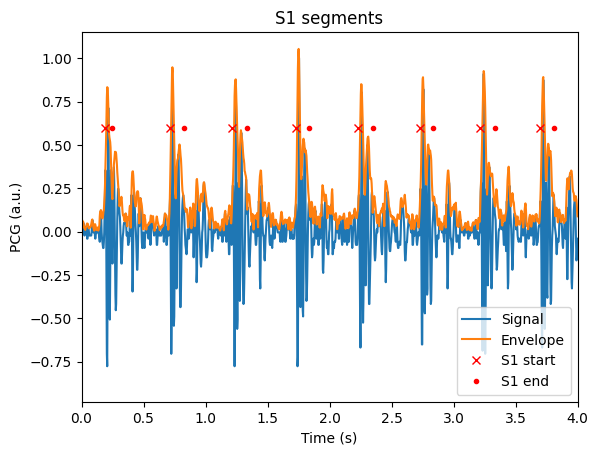

In [10]:
plt.figure()
pyPCG.plot(signal)
pyPCG.plot(envelope)
plt.plot(starts/signal.fs,np.ones_like(starts)*0.6,'rx')
plt.plot(ends/signal.fs,np.ones_like(ends)*0.6,'r.')
plt.legend(["Signal","Envelope","S1 start","S1 end"])
plt.title("S1 segments")
plt.xlim((0,4))
plt.show()

Importing analysis tools

In [11]:
import pyPCG.features, pyPCG.stats

Calculating spectra of S1 segments

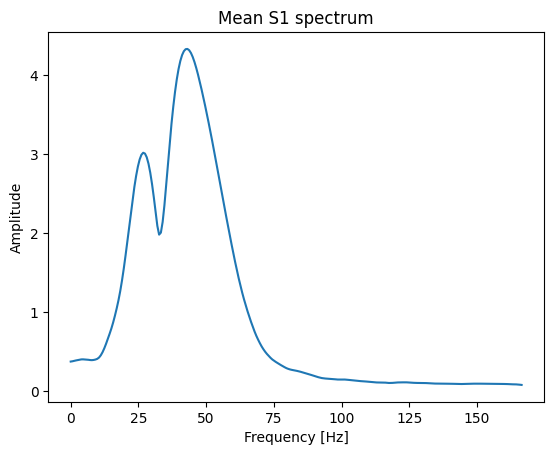

In [12]:
spectra = pyPCG.features.spectrum_raw(starts,ends,signal)

mean_spectrum = np.mean(spectra,axis=0)
freqs = np.linspace(0,signal.fs/2,256)

plt.figure()
plt.plot(freqs,mean_spectrum)
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.title("Mean S1 spectrum")
plt.show()

Basic spectral feature usage

In [13]:
max_freqs,_ = pyPCG.features.max_freq(starts,ends,signal)

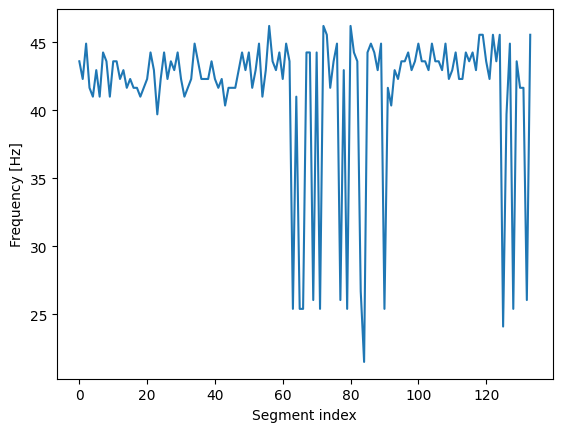

In [14]:
plt.figure()
plt.plot(max_freqs)
plt.xlabel("Segment index")
plt.ylabel("Frequency [Hz]")
plt.show()

Basic statistical analysis

In [15]:
max_freqs = pyPCG.stats.outlier_remove_transform(max_freqs)
mean_max_freq = pyPCG.stats.mean(max_freqs)
std_max_freq = pyPCG.stats.std(max_freqs)
print(f"{mean_max_freq:.1f}±{std_max_freq:.1f} Hz")

43.2±1.4 Hz


Decision making?